In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv("hiring.csv")

In [3]:
d
d['experience']=d['experience'].fillna("zero")

In [4]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [5]:
from word2number import w2n

In [6]:
d["experience"]=d["experience"].apply(w2n.word_to_num)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      int64  
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [8]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [9]:
d.rename(columns={'test_score(out of 10)':'testscore'},inplace=True)
d.rename(columns={'interview_score(out of 10)':'interviewscore'},inplace=True)
d.rename(columns={'salary($)':'salary'},inplace=True)

In [10]:
median_testscore=d.testscore.median()

In [11]:
d['testscore']=d['testscore'].fillna(median_testscore)

In [12]:
d

,experience,testscore,interviewscore,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


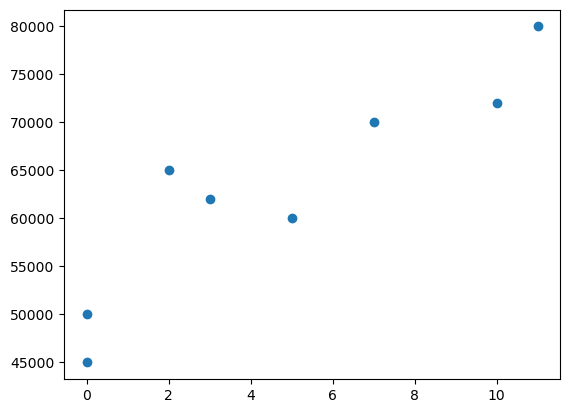

In [13]:
import matplotlib.pyplot as plt
plt.scatter(d.experience,d.salary)

In [14]:
Mr=linear_model.LinearRegression()
Mr

LinearRegression()

In [15]:
model=Mr.fit(d[['experience','testscore','interviewscore']],d.salary)

In [16]:
model.predict([[2,9,6]])

array([53205.96797671])

In [17]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

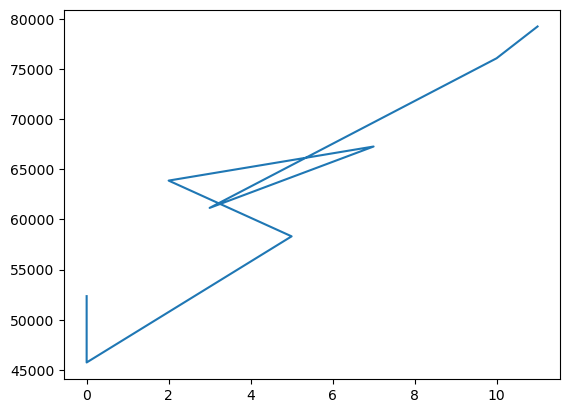

In [18]:
plt.plot(d.experience,model.predict(d[['experience','testscore','interviewscore']]))